Notebook to experiment with scaling the number of spatial nodes.

Motivation: EigenMarkov diffusion worked with 10 nodes, but there was a mismatch upon scaling to 100 spatial locations.

### INIT

In [1]:
import sys

sys.path.append("../src/")

# Models
from utils.param_utils import get_ca_init_idx
import models.FiniteDiffRxnDiffusion as fdrd
import models.SpectralRxnDiffusion as srd
from utils.RunMultiruns import *
from utils.PlotMultiruns import PlotMultiRuns

In [8]:
# PLOTTING
binomial_sampling = False  # use binomial sampling for eme markov simulation
print_eigenvalues_and_vectors = False
print_eigenmode_init_conditions = False
print_eigenmode_transition_probability = False
print_eigenmodes_to_spatial_nodes = False
plot_eigenmodes = False
plot_eigenvectors = False
plot_eigenmode_init_conditions = False
plot_eigenmode_markov_simulation = False

### Parameters

In [3]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_eigenmodes = 101  # NOTE: only used in SpectralRxnDiffusion
n_runs = 10  # number of runs for multirun simulations (stochastic)

### FINITE DIFFERENCE

Stability condition satisfied: 1 <= 3.6363636363636362
Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


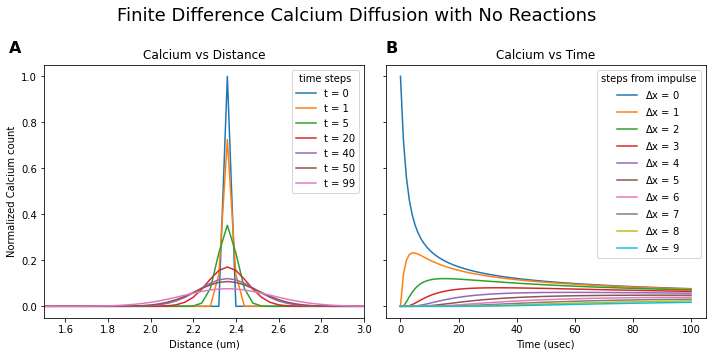

In [9]:
# FINITE DIFFERENCE
# DETERMINISTIC AND NODAL
# NOTE: FD has internal number of particles == 5275
fd = fdrd.FiniteDiffRxnDiffusion(
    n_spatial_locs=n_space_pts, n_time_pts=n_time_pts, impulse_idx=ca_init_idx
)

fd.simulate_diffusion()
fd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### SPECTRAL

Initializing solution array...
Beginning simulation...
Time step:  0
Time step:  10
Time step:  20
Time step:  30
Time step:  40
Time step:  50
Time step:  60
Time step:  70
Time step:  80
Time step:  90
Simulation complete!
Plotting...


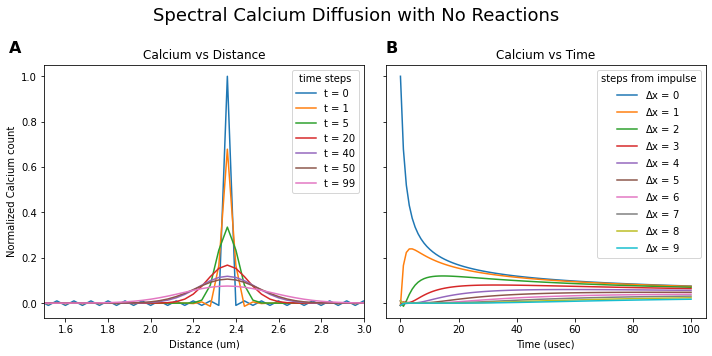

In [5]:
# SPECTRAL
# DETERMINISTIC AND MODAL
# NOTE: SRD has internal number of particles == 5275

sd = srd.SpectralRxnDiffusion(
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
    n_eigenmodes=n_eigenmodes,
)

sd.simulate_diffusion()
sd.plot_diffusion([0, 1, 5, 20, 40, 50, 99])

### RANDOM WALK

In [4]:
# RANDOM WALK
# STOCHASTIC AND NODAL
multi_rw = RWRunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
)

multi_rw.run_multi(data_dir="../data")

Made new directory: ../data/eme-validation/random-walk/20240221_122233/
RUNNING SIMULATION 0


Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


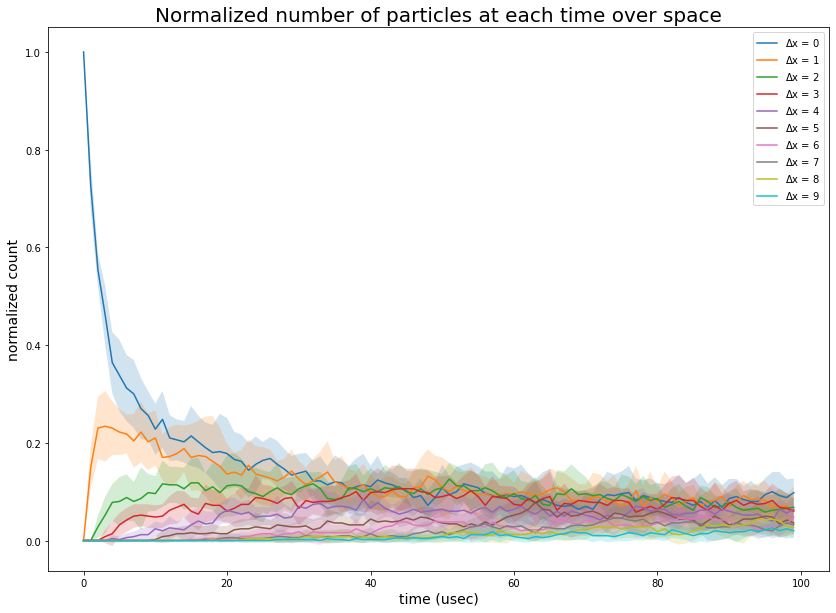

In [6]:
plotter = PlotMultiRuns(
    dir="/Users/margotwagner/projects/diffusion-model/data/eme-validation/random-walk/20240221_122233/",
    file_id="rw",
)

plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


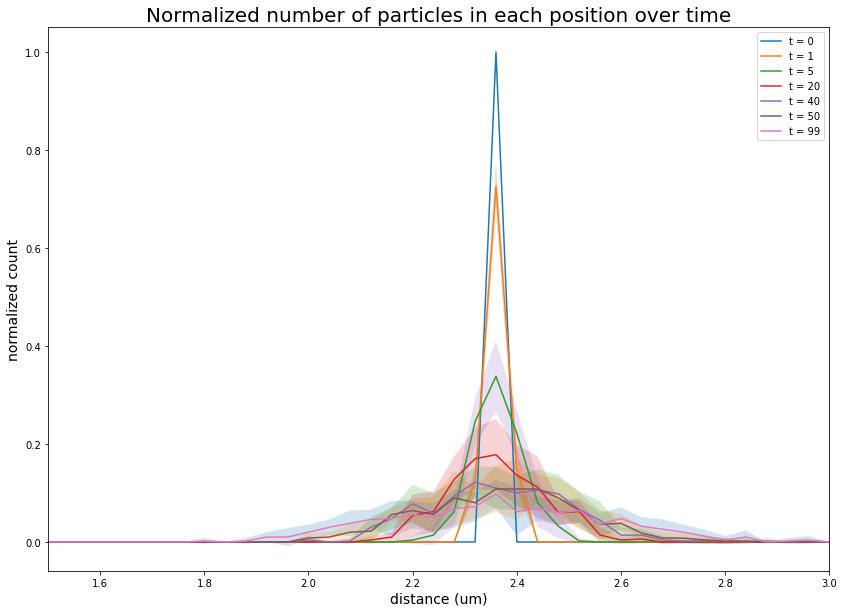

In [7]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])

### EIGENMARKOV

In [6]:
# EIGENMARKOV
# STOCHASTIC AND MODAL

multi_eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    particle_start_loc=ca_init_idx,
)

multi_eme.run_multi(data_dir="../data")

Made new directory: ../data/eme-validation/markov-eme/20240221_122425/
RUNNING SIMULATION 0


In [2]:
plotter = PlotMultiRuns(
    dir="/Users/margotwagner/projects/diffusion-model/data/eme-validation/markov-eme/20240221_122425/",
    file_id="eme",
)

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


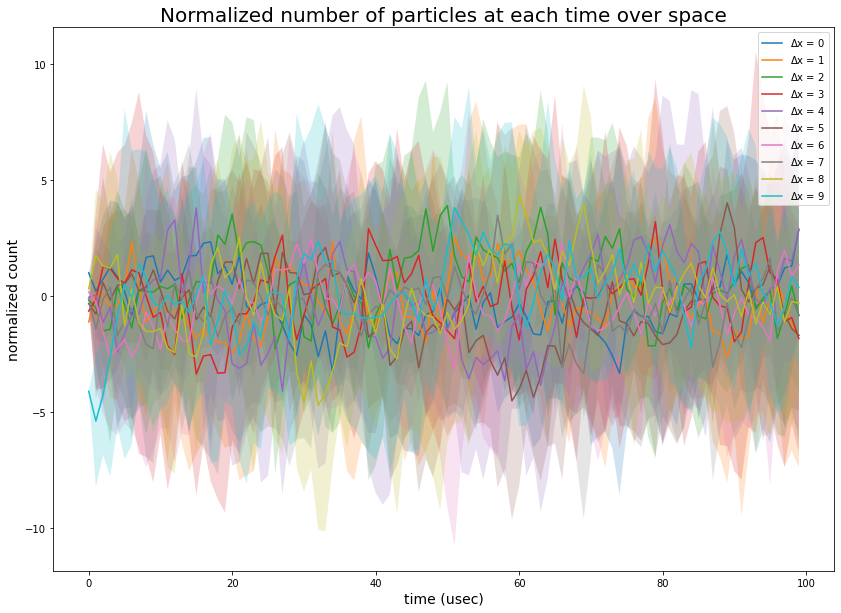

In [3]:
plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


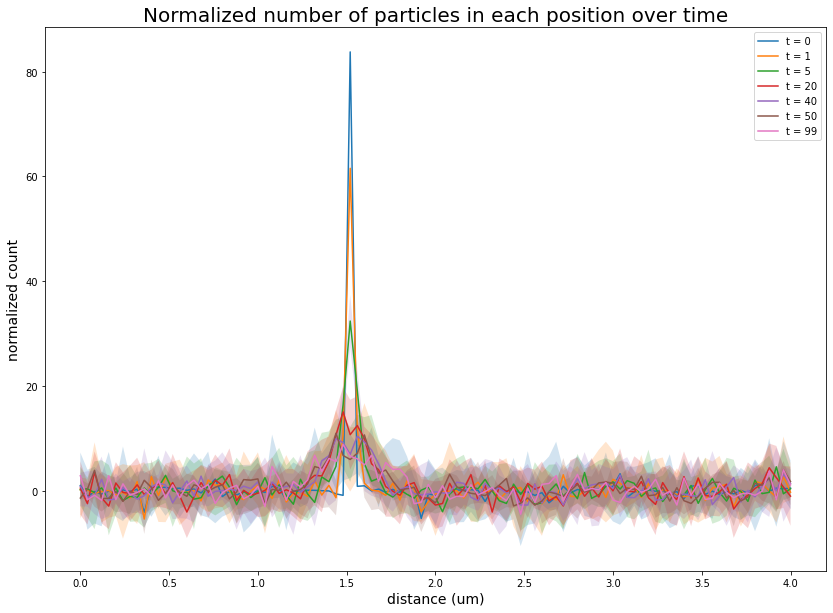

In [1]:
import sys

sys.path.append("../src/")
from utils.RunMultiruns import *
from utils.PlotMultiruns import PlotMultiRuns

plotter = PlotMultiRuns(
    dir="/Users/margotwagner/projects/diffusion-model/data/eme-validation/markov-eme/20240221_122425/",
    file_id="eme",
)

plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])